In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("position_salaries.csv")

In [2]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
#dataset = dataset.drop('Level', axis=1)

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Label'] = le.fit_transform(dataset['Salary'])'''

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndataset['Label'] = le.fit_transform(dataset['Salary'])"

In [6]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


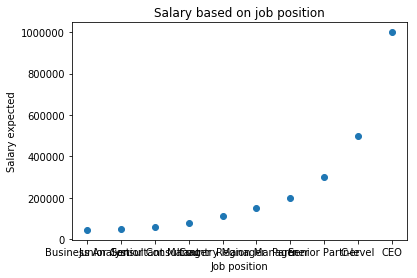

In [8]:
plt.scatter(dataset['Position'], dataset['Salary'])
plt.title('Salary based on job position')
plt.xlabel('Job position')
plt.ylabel('Salary expected')
plt.show()

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

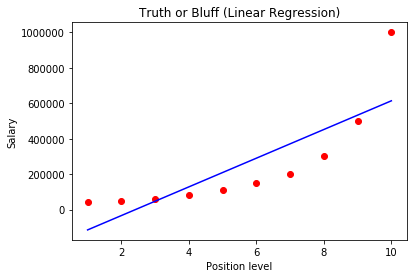

In [12]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, linreg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [13]:
#Polynomial Regression

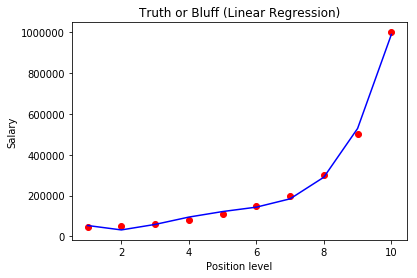

In [22]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=4)
pol_reg = LinearRegression()
X_poly = polynom.fit_transform(X)
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(polynom.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [24]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [25]:
#Make predictions for someone with a 5.5 Year Experience
# Predicting a new result with Linear Regression
linreg.predict([[5.5]])
#output should be 249500



array([249500.])

In [29]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(polynom.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750003])

In [30]:
#Predicting salary from test_dataset
y_predict_slr = linreg.predict(X_test)
#Model evaluation using R_square for simple linear regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print("R-square error associated with Simple Linear Reg:", r_square)

R-square error associated with Simple Linear Reg: 0.9205324717432464


In [31]:
#Predicting salary from test_dataset
y_predict_pr = pol_reg.predict(polynom.fit_transform(X_test))
#Model evaluation using R_square for simple linear regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print("R-square error associated with Polynomial Reg:", r_square)

R-square error associated with Polynomial Reg: 0.9885818934201032
